In [1]:
import numpy as np

In [2]:
eval = np.load('../results/agents/a1a/evaluations.npz')

In [4]:
for item in eval.files:
    print(item)
    print(eval[item])

timesteps
[ 249856  499712  749568  999424 1249280 1499136 1748992 1998848 2248704
 2498560 2748416 2998272 3248128 3497984 3747840 3997696 4247552 4497408
 4747264]
results
[[[-5.]
  [-5.]
  [-5.]
  ...
  [-4.]
  [-5.]
  [-5.]]

 [[-5.]
  [-4.]
  [-5.]
  ...
  [-5.]
  [-5.]
  [-5.]]

 [[-5.]
  [-1.]
  [-3.]
  ...
  [-5.]
  [-2.]
  [-3.]]

 ...

 [[ 0.]
  [-1.]
  [ 0.]
  ...
  [ 0.]
  [-1.]
  [ 1.]]

 [[ 0.]
  [ 1.]
  [ 0.]
  ...
  [ 0.]
  [-2.]
  [ 0.]]

 [[-3.]
  [ 1.]
  [ 0.]
  ...
  [ 2.]
  [-1.]
  [ 0.]]]
ep_lengths
[[ 759  584  603 ...  849  586  598]
 [1453 1053 1293 ... 1172  882  839]
 [2534 3000 3000 ... 2650 3000 3000]
 ...
 [3000 3000 3000 ... 3000 3000 3000]
 [3000 3000 3000 ... 3000 3000 3000]
 [3000 3000 3000 ... 3000 3000 3000]]


In [10]:
eval['timesteps'].shape

(19,)

In [9]:
eval['results'].shape

(19, 1000, 1)

19 checkpoints, each with score evaluation over 1000 trials 
against the expert

we want to plot the score for each timesteps

In [11]:
for ts in eval['timesteps']:
    print(ts)

249856
499712
749568
999424
1249280
1499136
1748992
1998848
2248704
2498560
2748416
2998272
3248128
3497984
3747840
3997696
4247552
4497408
4747264


In [16]:
# currently score is stored as 1000 individual game scores
# we want the mean of them for the timestep 

avg_score = np.mean(eval['results'],axis=1).flatten()
print(avg_score.shape)
print(avg_score)

(19,)
[-4.868 -4.791 -2.311 -1.737 -3.132 -0.666 -2.583 -1.518 -0.737 -0.621
 -0.102  0.113  0.032 -0.209  0.1    0.105  0.126  0.19   0.081]


In [17]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, "Agent's Score vs. Expert during Training")

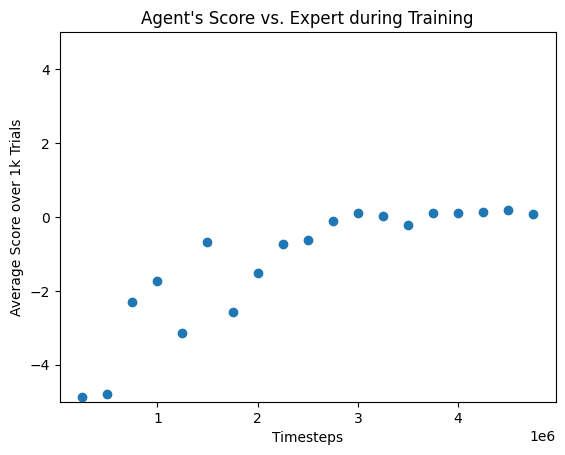

In [21]:
plt.scatter(eval['timesteps'], avg_score)
plt.ylim([-5,5])
plt.xlabel('Timesteps')
plt.ylabel('Average Score over 1k Trials')
plt.title("Agent's Score vs. Expert during Training")


In [22]:
## Load Data
def avg_score(results):
    return np.mean(results, axis=1).flatten()

def load(file):
    data = np.load(file)
    return data['timesteps'], avg_score(data['results'])

a1a = load('../results/agents/a1a/evaluations.npz')
a1b = load('../results/agents/a1b/evaluations.npz')
a2a = load('../results/agents/a2a/evaluations.npz')
a2b = load('../results/agents/a2b/evaluations.npz')

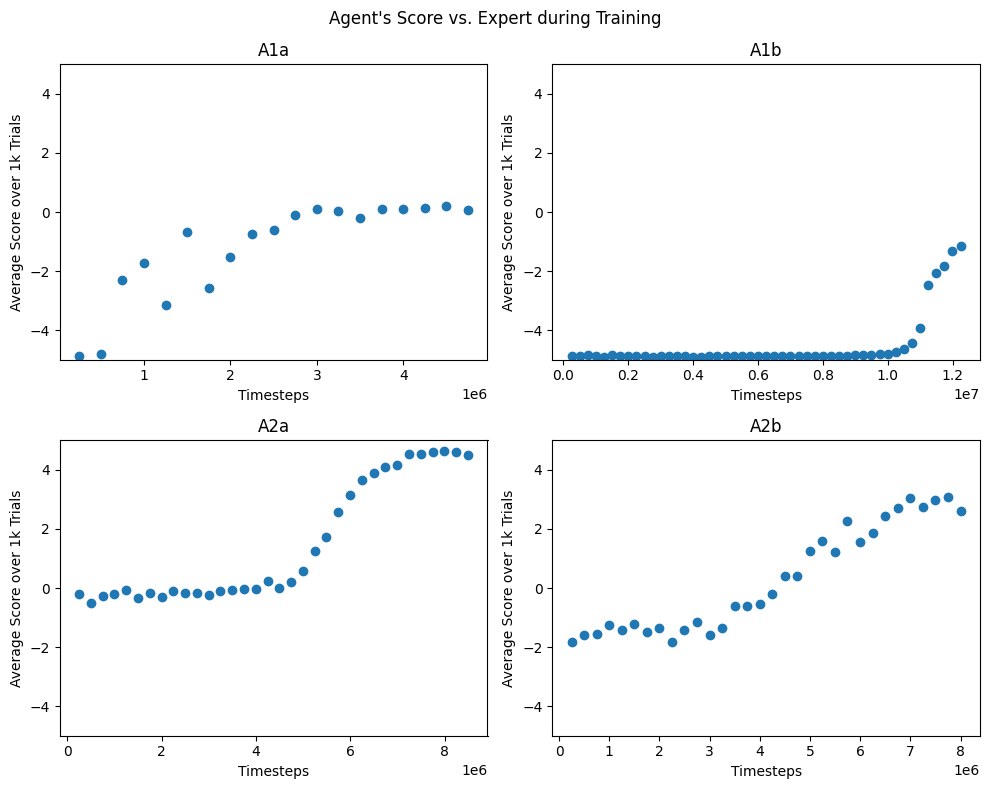

In [26]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plot the data in each subplot
axs[0, 0].scatter(a1a[0], a1a[1])
axs[0, 1].scatter(a1b[0], a1b[1])
axs[1, 0].scatter(a2a[0], a2a[1])
axs[1, 1].scatter(a2b[0], a2b[1])

# Add titles and axis labels for each subplot


axs[0, 0].set_ylim([-5,5])
axs[0, 1].set_ylim([-5,5])
axs[1, 0].set_ylim([-5,5])
axs[1, 1].set_ylim([-5,5])

axs[0, 0].set_title('A1a')
axs[0, 1].set_title('A1b')
axs[1, 0].set_title('A2a')
axs[1, 1].set_title('A2b')

axs[0, 0].set_xlabel('Timesteps')
axs[0, 1].set_xlabel('Timesteps')
axs[1, 0].set_xlabel('Timesteps')
axs[1, 1].set_xlabel('Timesteps')

axs[0, 0].set_ylabel('Average Score over 1k Trials')
axs[0, 1].set_ylabel('Average Score over 1k Trials')
axs[1, 0].set_ylabel('Average Score over 1k Trials')
axs[1, 1].set_ylabel('Average Score over 1k Trials')

# Add a main title for the entire figure
fig.suptitle('Agent\'s Score vs. Expert during Training')

# Adjust the spacing between subplots
fig.tight_layout()